### Math Behind Simple Linear Regression

#### Variance and Standard Deviation
- Variance tells us how much a single variable varies with respect to its mean
- Variance tells us how much data is spread around the center of distribution (Mean)
- Variance does not give any information, so we calculate any standard deviation
  Standard Deviation = sqrt((sum(x-xbar)**2)/(n-1))

In [9]:
import numpy as np
x = np.array([0,5,20,40,45])
n = len(x)
sd = np.sqrt(np.sum((x-np.mean(x))**2)/(n-1))
print(sd)

20.18662923818635


In [10]:
sd1 = np.std(x, ddof=1)
print(sd1)

20.18662923818635


- Less standard deviations means that most values in the dataset are close to the mean
- High Standard deviations means that most value are spread out broadly from the mean

#### Covariance
- Covariance tells us that how two variables x, y are related and to each other and how their mean varies together
- Covariance measures the direction of the relationship between two random variables 
- Its value range from negative infinity to positive infinity
- (sum(x-mean(x))(y-mean(y)))/(n-1)

In [17]:
import numpy as np
import seaborn as sns
x  = np.array([1,0,2,6,4,3,3])
y= np.array([95,90,90,55,70,80,85])

n = len(x)
cov = (np.sum( np.multiply(x-np.mean(x), y-np.mean(y)) ))/(n-1)
print(cov)

-25.5952380952381


[[  3.9047619  -25.5952381 ]
 [-25.5952381  195.23809524]]


<Axes: >

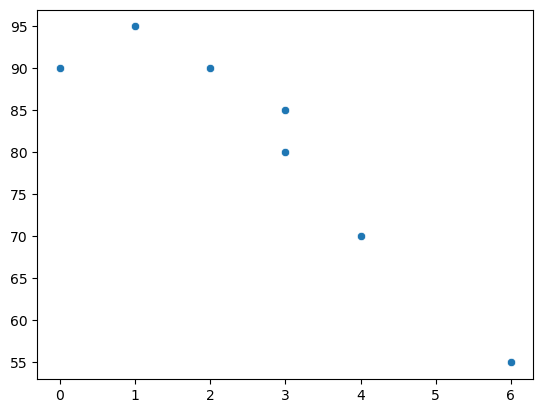

In [18]:
cov1 = np.cov(x,y)
print(cov1)
sns.scatterplot(x=x,y=y)

- Positive covariance indicates that there is a positive relationship between two variables (move in the same direction)
- Negative covariance indicates that there is a negative relationship between two variables (move in the opposite direction)
- Zero covariance indicates that there is no relationship between variables

#### Correlation
- Correlation tells us the direction as well as the magnitude of the relationship between two independent variables
- Its value range from -1 to +1
- Correlation = cov(x,y) / (std(x)*std(y))
- Correlation = sum(x-mean(x))(y-mean(y))/(sqrt((x-mean(x))**2)(sqrt((y-mean(y))**2)

0.9821465634751865


<Axes: >

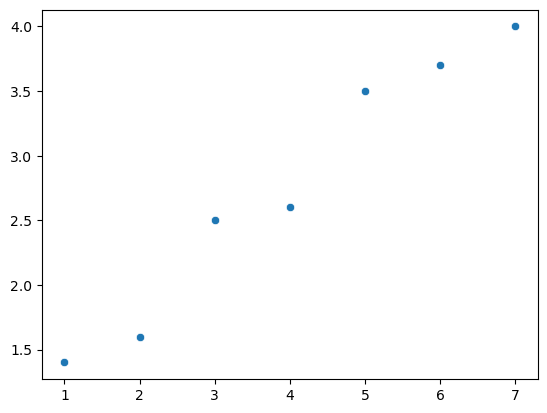

In [25]:
x  = np.array([1, 2, 3, 4, 5, 6, 7.]) # study hours 
y = np.array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4.0])
corr = (np.sum(np.multiply(x-np.mean(x), y-np.mean(y))))/(np.multiply((np.sqrt(np.sum((x-np.mean(x))**2))), np.sqrt(np.sum((y-np.mean(y))**2))))
print(corr)
sns.scatterplot(x=x,y=y)

- Positve 1 shows that there is strong +ve relation and move in the same direction
- Zero shows that there is no relationship
- Negative 1 shows that is a strong reverse relation (move in the opposite direction)

### Regression
- It relates a dependent variable with one or more independent variables
- It is used to predict/forcast the value of dependent variable based on the known values of the independent variables
- Output variable is a real value like salary, cost, gpa, 

### Simple Linear Regression
- It is a type of model where the relationship between a dependent variable and one or more independent variable is assumed to be linear
- There are two types of linear regression
- ***Simple Linear Regression***
- One dependent and one independent variable 
- ***Multiple Linear Regression***
- More than one independent variable and one dependent variable

### Ordinary Least Square Method
- The process of fitting the best fit line is called ordinary least square method
- It is a techniques that works by minimizing the sum of the squares of the differences between the observed depended variable and the independent variable 

beta1 = (sum(x-mean(x))(y-mean(y)))/(sum(x-mean(x))**2)
beta0 = mean(y)-beta1*x

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('datasets/study-hours.csv')
df

,study_hours,gpa
0,1.0,1.4
1,2.0,1.6
2,3.0,2.5
3,4.0,2.6
4,5.0,3.5
5,6.0,3.7
6,7.0,4.0


In [5]:
x = np.array(df['study_hours'])
y = np.array(df['gpa'])

In [18]:
numerator = np.sum((x-np.mean(x))*(y-np.mean(y)))
denomirator = np.sum((x-np.mean(x))**2)
beta1 = numerator/denomirator
beta0 = np.mean(y)-beta1*np.mean(x)
print(beta1, beta0)
# sns.scatterplot(x=x,y=y)

0.4642857142857144 0.8999999999999995


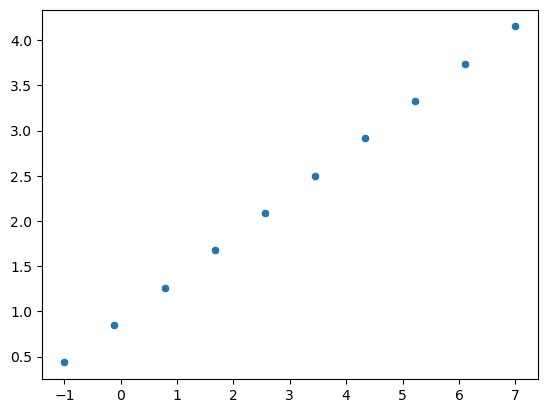

In [17]:
# xpointsofline = np.linspace(-1, 7, 10)
# ypointsofline = beta0 + beta1 * xpointsofline
# sns.scatterplot(x=xpointsofline, y=ypointsofline);

In [19]:
y = beta0 + beta1*4.5
print(y)

2.9892857142857143


#### Evaluation of the Regression Models

In [5]:
x = np.array(df['study_hours'])
y = np.array(df['gpa'])
numerator = np.sum((x-np.mean(x))*(y-np.mean(y)))
denomirator = np.sum((x-np.mean(x))**2)
beta1 = numerator/denomirator
beta0 = np.mean(y)-beta1*np.mean(x)

In [ ]:
Sum of Square due to Error = SSE = np.sum((y-preY)**2)
Sum of Square due to Regression = SSR = np.sum((preY-yhat)**2)
Total sum of Square = SST = np.sum((y-hhat)**2)
Mean Absolute Error = MAE = (np.sum(abs(y-preY)))/n
Mean Square Error = MSE = (np.sum((y-PreY)**2))/n
Root Mean Sqaure Error = RMSE = np.sqrt((np.sum((y-PreY)**2))/n)

In [10]:
preY = beta0 + beta1 * x
yhat = np.mean(y)
n = len(y)

In [15]:
SSE = np.sum((y-preY)**2)
SSR = np.sum((preY-yhat)**2)
SST = np.sum((y-yhat)**2)
MAE = (np.sum(abs(y-preY)))/n
MSE = (np.sum((y-preY)**2))/n
RMSE = np.sqrt((np.sum((y-preY)**2))/n)
r2 = 1 - (SSE/SST)
print("SSE: ", SSE, "SSR: ", SSR, "SST: ", SST, "MAE: ", MAE, "MAE: ", MSE, "RMSE: ", RMSE, "R2: ", r2)

SSE:  0.22142857142857145 SSR:  6.0357142857142865 SST:  6.257142857142858 MAE:  0.15306122448979598 MAE:  0.031632653061224494 RMSE:  0.1778557085426962 R2:  0.9646118721461188
